<a href="https://colab.research.google.com/github/manjunathreddy25/decision_tree_model/blob/main/Decission_Tree_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Works/irrigation_prediction.csv')
df1 = df.copy()
df.head(10)

,Soil_Type,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Crop_Type,Crop_Growth_Stage,Season,Irrigation_Type,Water_Source,Field_Area_hectare,Mulching_Used,Previous_Irrigation_mm,Region,Irrigation_Need
0,Clay,6.14,36.48,0.42,2.17,21.90,31.19,1167.70,4.01,1.97,Wheat,Vegetative,Rabi,Rainfed,Reservoir,4.73,Yes,1.98,South,Low
1,Silt,6.41,50.56,0.38,0.23,36.50,26.01,831.28,10.72,16.82,Maize,Flowering,Zaid,Canal,Groundwater,12.22,Yes,33.56,Central,Medium
2,Sandy,7.71,40.07,1.09,2.18,41.83,76.41,1844.45,7.75,19.03,Cotton,Harvest,Rabi,Drip,Reservoir,5.52,Yes,34.62,South,Low
3,Clay,5.96,12.75,1.56,0.40,37.22,43.32,306.26,8.90,11.44,Wheat,Sowing,Kharif,Canal,Reservoir,1.43,Yes,84.03,North,Medium
4,Clay,7.76,18.58,0.95,2.52,22.38,86.44,1875.63,10.39,11.26,Cotton,Sowing,Zaid,Canal,River,2.52,No,60.86,South,Medium
5,Silt,5.10,20.50,0.37,1.43,33.34,62.51,402.92,7.03,13.55,Rice,Sowing,Zaid,Sprinkler,Groundwater,7.56,Yes,7.33,East,Medium
6,Sandy,7.44,22.70,0.59,2.95,28.02,58.50,764.95,7.08,7.38,Rice,Flowering,Kharif,Sprinkler,Reservoir,2.18,No,51.47,West,Medium
7,Sandy,7.68,40.23,0.62,3.30,35.60,79.10,833.33,5.17,3.73,Wheat,Vegetative,Zaid,Rainfed,Reservoir,12.54,Yes,118.96,West,Low
8,Clay,5.42,36.73,0.74,1.52,16.59,76.88,2476.03,10.34,1.80,Maize,Flowering,Kharif,Sprinkler,Rainwater,13.75,Yes,107.25,Central,Low
9,Loamy,6.26,19.58,0.36,1.67,31.14,74.30,1474.55,8.53,17.68,Rice,Vegetative,Rabi,Rainfed,Reservoir,1.27,Yes,97.92,Central,Medium


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Soil_Type                10000 non-null  object 
 1   Soil_pH                  10000 non-null  float64
 2   Soil_Moisture            10000 non-null  float64
 3   Organic_Carbon           10000 non-null  float64
 4   Electrical_Conductivity  10000 non-null  float64
 5   Temperature_C            10000 non-null  float64
 6   Humidity                 10000 non-null  float64
 7   Rainfall_mm              10000 non-null  float64
 8   Sunlight_Hours           10000 non-null  float64
 9   Wind_Speed_kmh           10000 non-null  float64
 10  Crop_Type                10000 non-null  object 
 11  Crop_Growth_Stage        10000 non-null  object 
 12  Season                   10000 non-null  object 
 13  Irrigation_Type          10000 non-null  object 
 14  Water_Source           

Checking Null and duplicated values

In [5]:
df.isnull().sum()     # 0 null values
df.duplicated().sum() # 0 duplicate values

np.int64(0)

Statistical Representation

In [6]:
df.describe()

,Soil_pH,Soil_Moisture,Organic_Carbon,Electrical_Conductivity,Temperature_C,Humidity,Rainfall_mm,Sunlight_Hours,Wind_Speed_kmh,Field_Area_hectare,Previous_Irrigation_mm
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.487857,36.969207,0.944731,1.791963,26.991423,60.080339,1252.499420,7.518538,10.163545,7.598024,59.864122
std,0.979963,16.430845,0.372406,0.984202,8.664074,20.187973,715.582201,2.016077,5.670923,4.233919,34.483722
min,4.800000,8.000000,0.300000,0.100000,12.000000,25.000000,0.380000,4.000000,0.500000,0.300000,0.020000
25%,5.640000,22.860000,0.620000,0.940000,19.460000,42.855000,634.155000,5.760000,5.160000,3.950000,30.160000
50%,6.470000,37.240000,0.950000,1.780000,27.090000,60.040000,1250.335000,7.560000,10.190000,7.540000,59.630000
75%,7.350000,50.940000,1.260000,2.650000,34.500000,77.705000,1880.265000,9.260000,15.100000,11.202500,90.030000
max,8.200000,65.000000,1.600000,3.500000,42.000000,95.000000,2499.690000,11.000000,20.000000,15.000000,119.990000


In [7]:
# Numerical columns
num_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Categorical columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))


Numerical Columns: ['Soil_pH', 'Soil_Moisture', 'Organic_Carbon', 'Electrical_Conductivity', 'Temperature_C', 'Humidity', 'Rainfall_mm', 'Sunlight_Hours', 'Wind_Speed_kmh', 'Field_Area_hectare', 'Previous_Irrigation_mm']
Categorical Columns: ['Soil_Type', 'Crop_Type', 'Crop_Growth_Stage', 'Season', 'Irrigation_Type', 'Water_Source', 'Mulching_Used', 'Region', 'Irrigation_Need']


Graphs

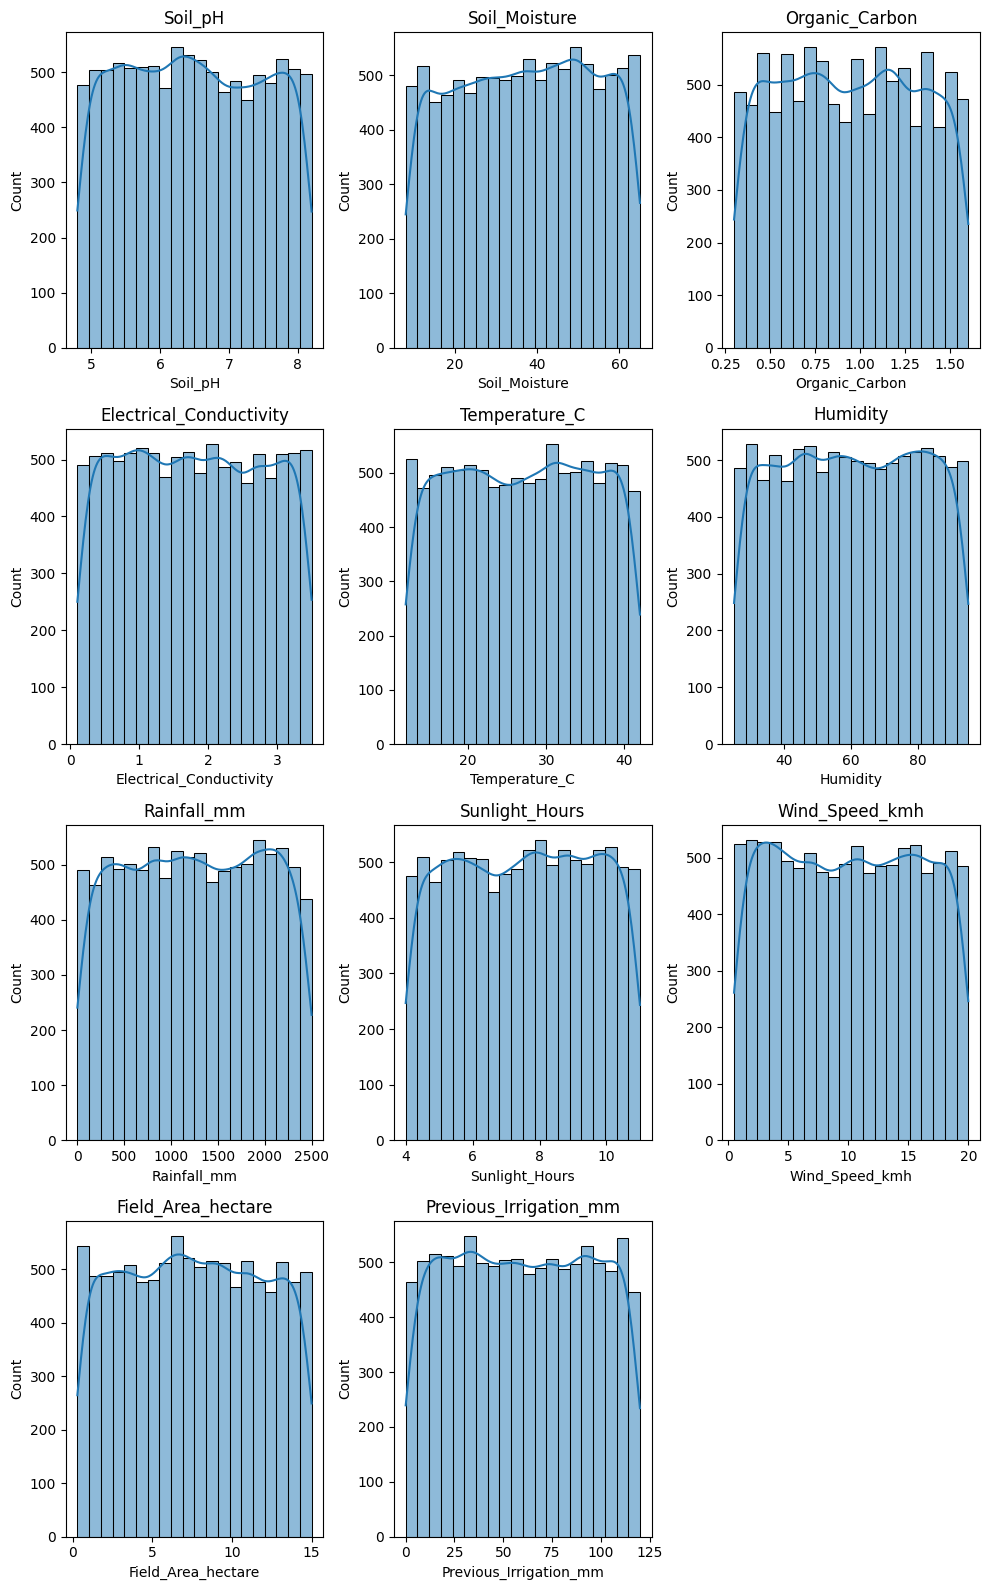

In [32]:
# From these plots, we can spot skewness
# and decide whether transformations or scaling
# are required before modeling.
import math
import matplotlib.pyplot as plt
cols = num_cols
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(10, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.histplot(df[col], kde=True, bins=20)
    plt.title(col)

plt.tight_layout()
plt.show()

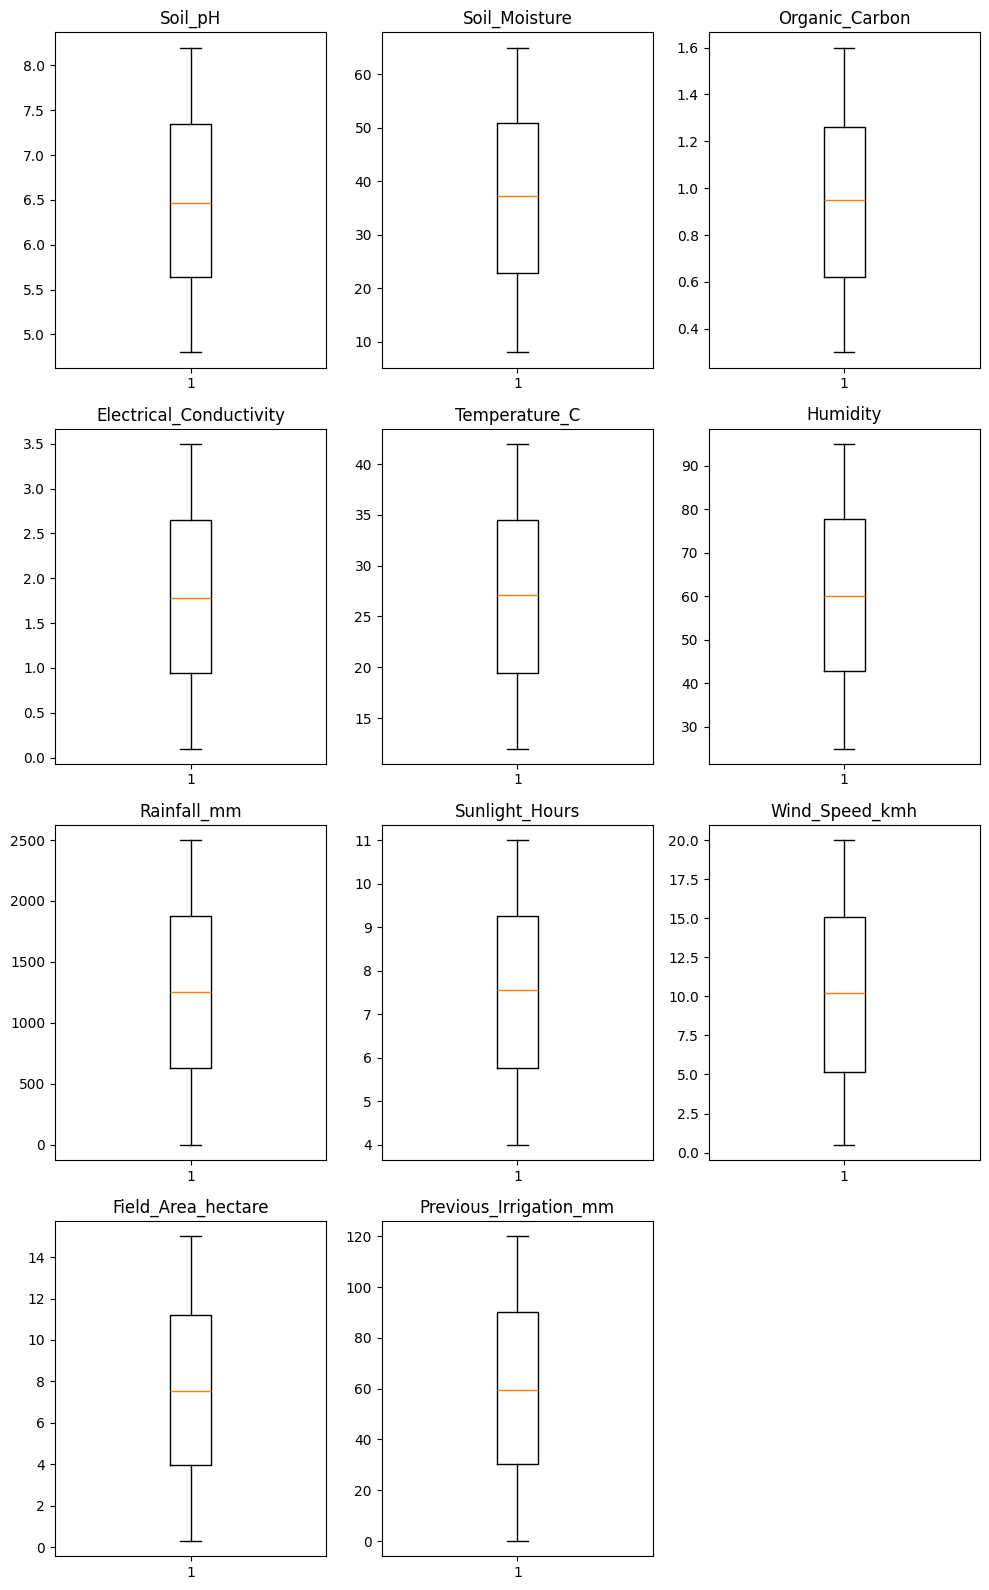

In [33]:
# From these plots, we can detect extreme values
# that may need treatment before applying machine learning models.
import math
import matplotlib.pyplot as plt

cols = num_cols
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(10, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    plt.boxplot(df[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()



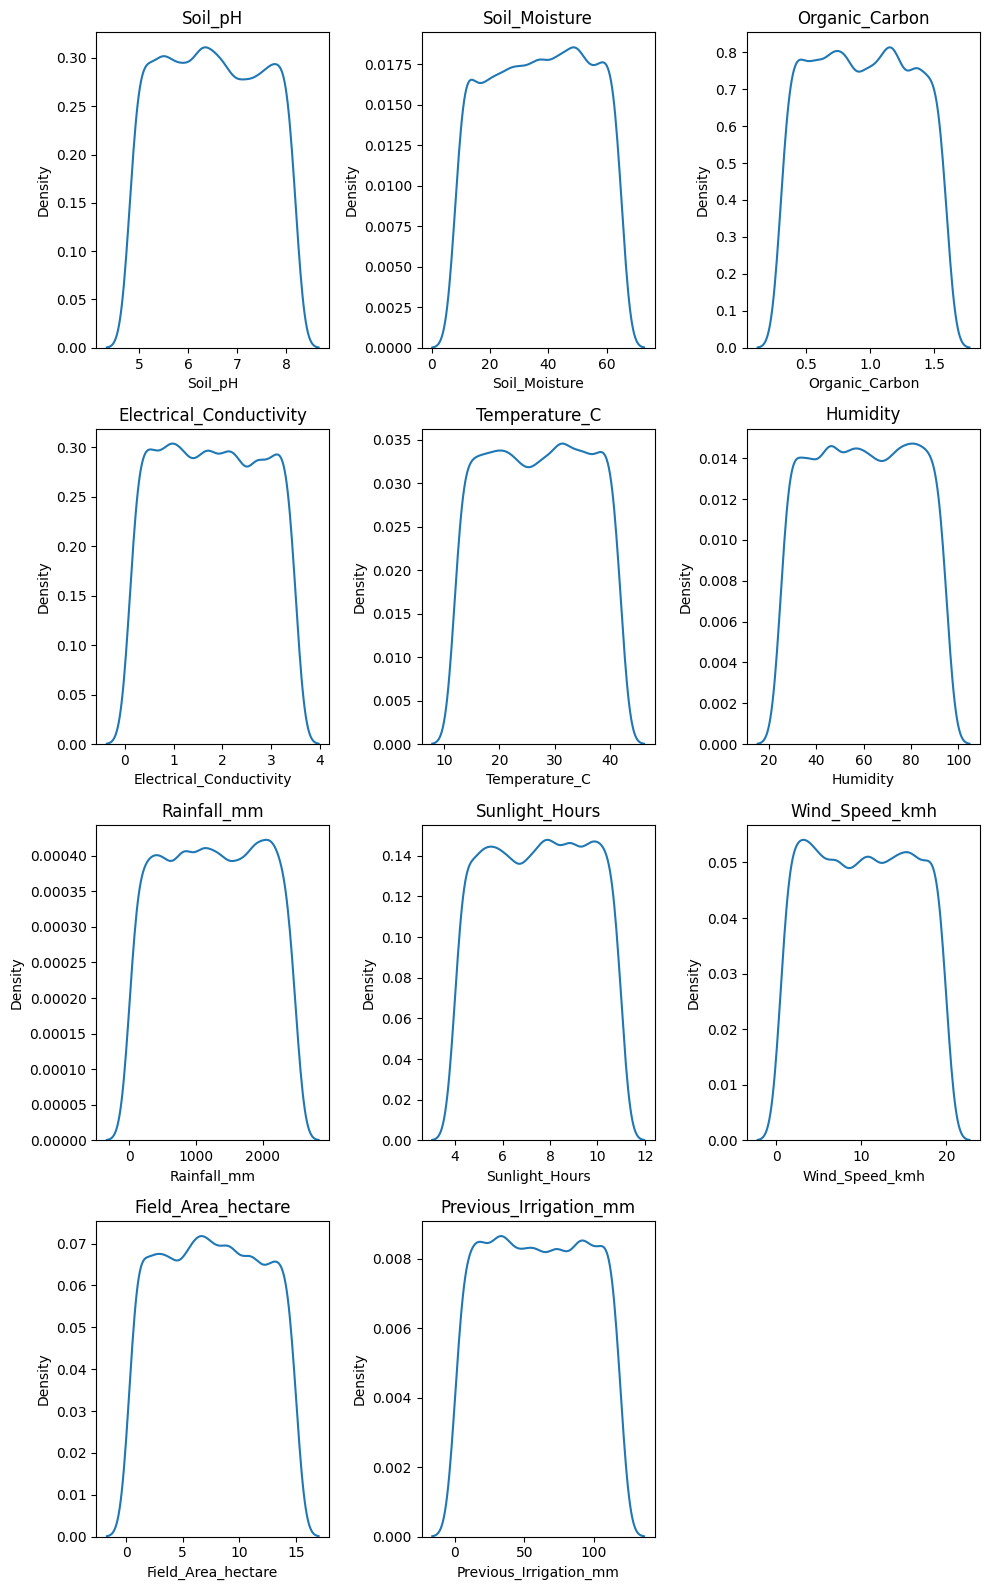

In [34]:
# From these plots, we can understand the underlying data distribution
# and decide if normalization or transformation is needed
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = num_cols
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(10, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.kdeplot(df[col].dropna())
    plt.title(col)

plt.tight_layout()
plt.show()


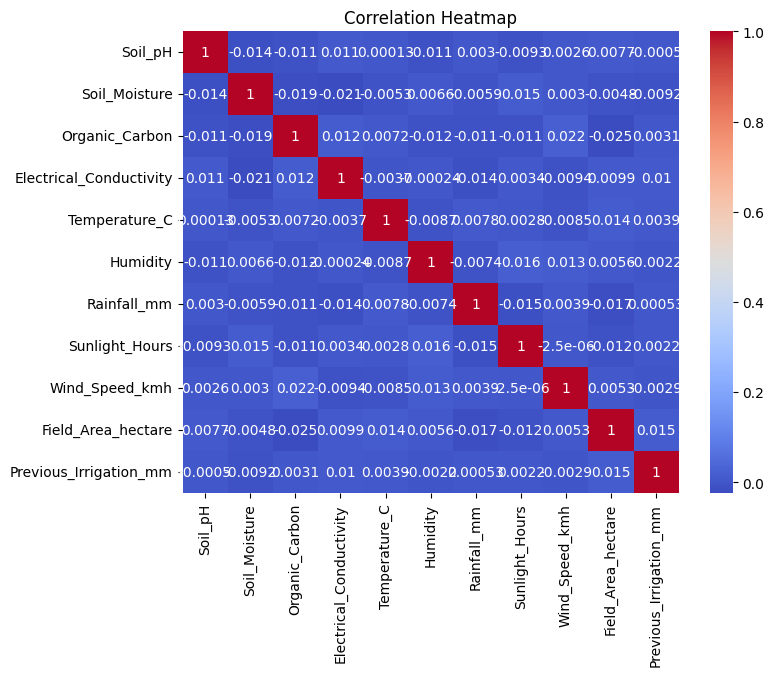

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

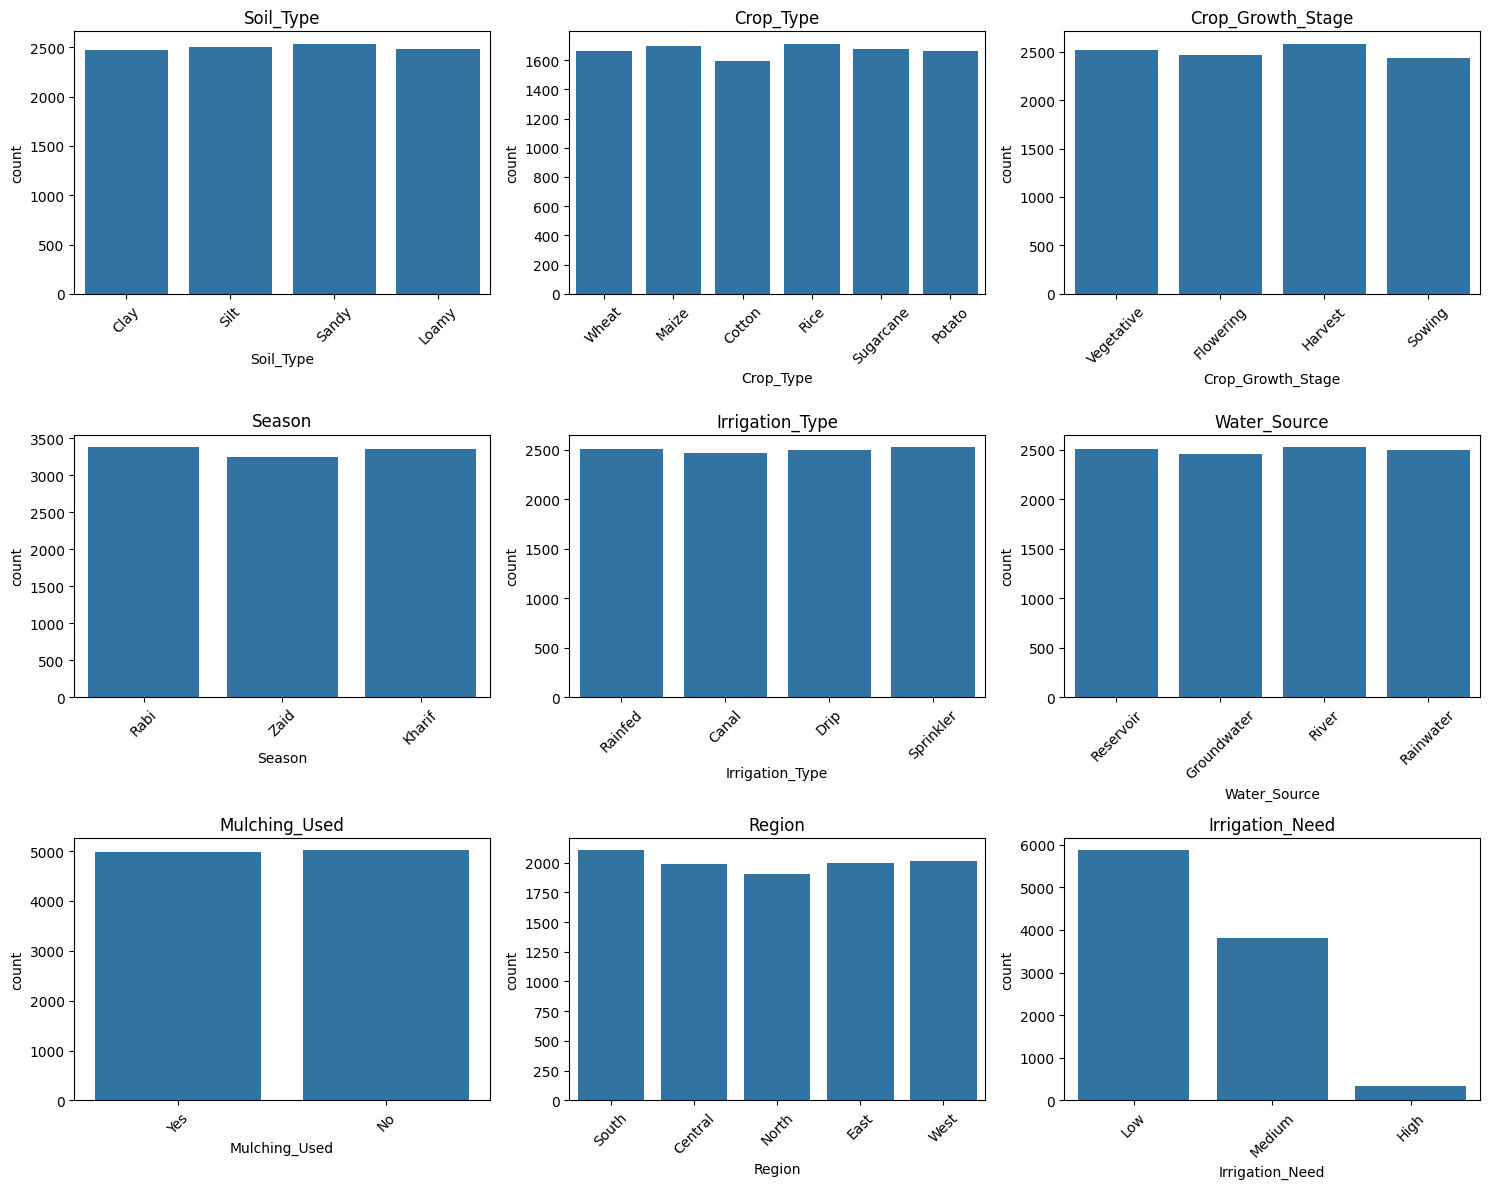

In [12]:
# From these plots, we can detect class imbalance,
# which is important for feature encoding and model performance.
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = cat_cols
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    sns.countplot(x=df[col])
    plt.title(col)
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


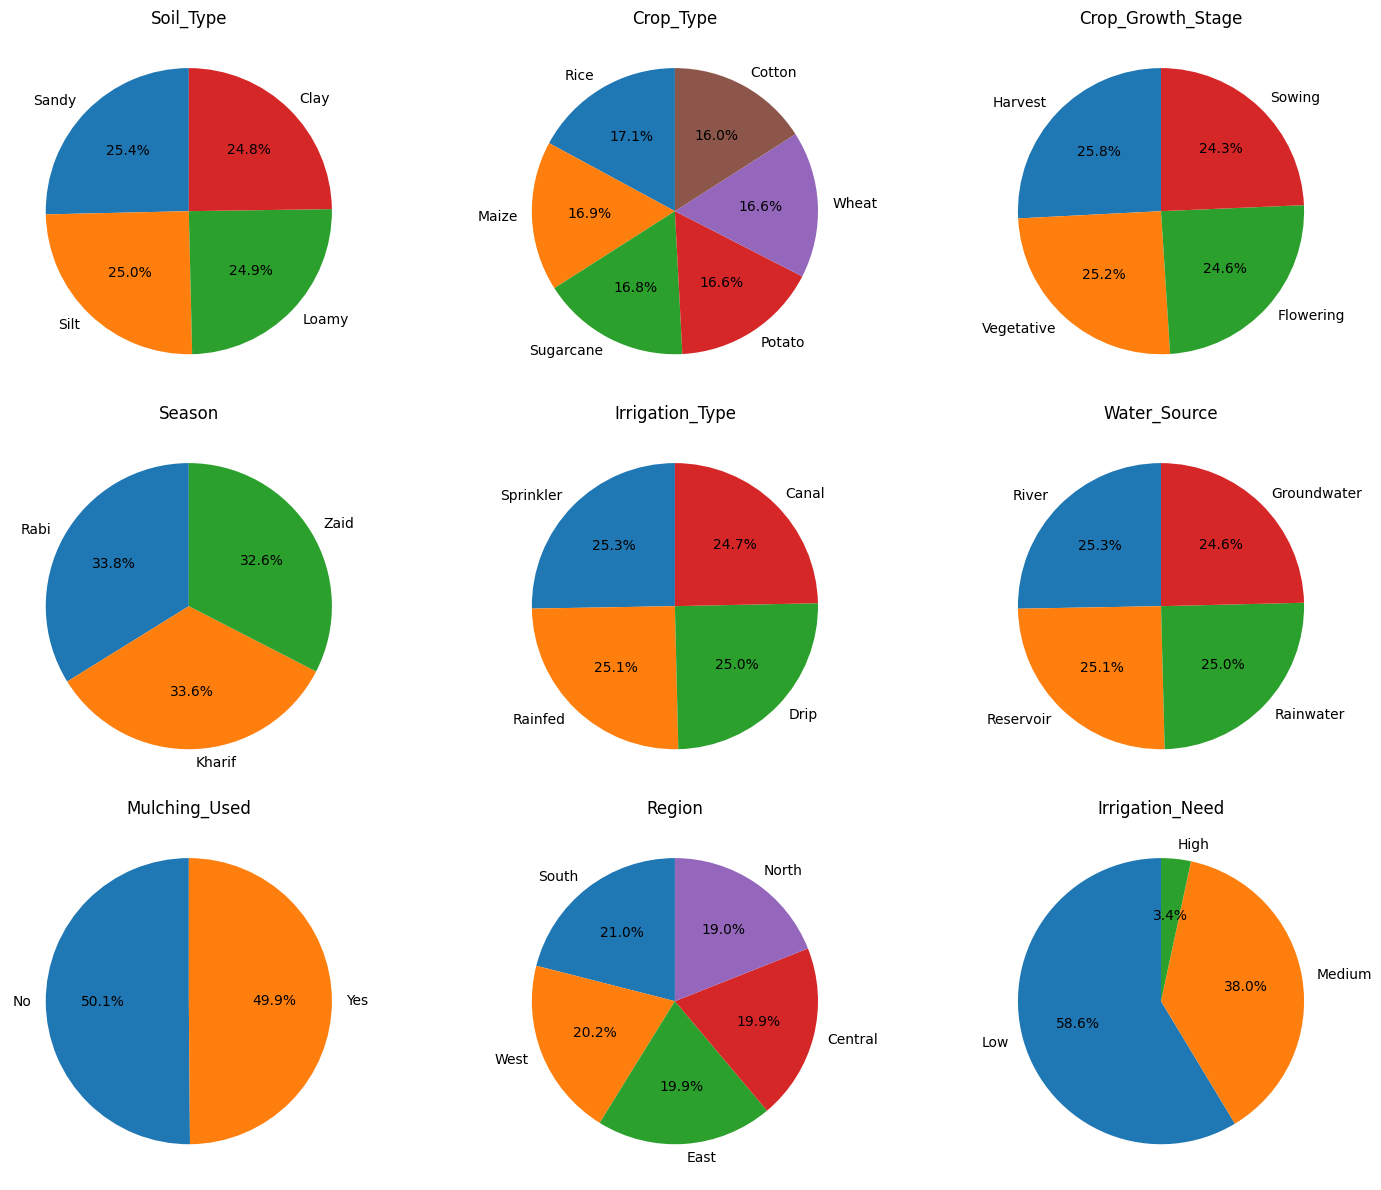

In [13]:
import math
import matplotlib.pyplot as plt

cols = cat_cols
n = len(cols)
rows = math.ceil(n / 3)

plt.figure(figsize=(15, rows * 4))

for i, col in enumerate(cols, 1):
    plt.subplot(rows, 3, i)
    df[col].value_counts().plot.pie(
        autopct='%1.1f%%',
        startangle=90
    )
    plt.title(col)
    plt.ylabel('')  # remove default ylabel

plt.tight_layout()
plt.show()


In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop('Irrigation_Need', axis=1)
y =df['Irrigation_Need']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


In [18]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [19]:
import pandas as pd

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test  = pd.DataFrame(X_test, columns=X.columns)


In [20]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
y_pred = model.predict(X_test)


In [22]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.727


In [23]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Confusion Matrix:
 [[  16    1   42]
 [   0 1004  200]
 [   2  301  434]]


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9905


In [25]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9895


In [26]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

y_pred_gb = gb.predict(X_test)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))


Gradient Boosting Accuracy: 0.9935


In [27]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators=100, random_state=42)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))


AdaBoost Accuracy: 0.775


In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))


KNN Accuracy: 0.6885


In [29]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf')
svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


SVM Accuracy: 0.8405


In [30]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:33:13] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.996


In [31]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.7905
